# 弱人工智慧（機器學習）：模擬人類具有思維能力的表現，用統計機率學來處理問題，從歷史資料建立模型，預測未來

## 監督式學習（Supervised Learning）：ｙ為等距資料之回歸分析（Regression）、ｙ為非等距之分類問題（Classification）
## 非監督式學習（Unsupervised Learning）：降低維度（Dimension Reduction）、分群問題（Clustering）
## 半監督式學習（Semi-supervised Learning）
## 增強式學習（Reinforcement Learning）

https://scikit-learn.org/stable/_static/ml_map.png

# 決策樹:規則模型
# e.g.
# 假使使用者為女性
# 而且月收入高達3萬以上
# 而且還沒看過這廣告
# 點擊機率為11%

# 信息熵(entropy)
### https://zh.wikipedia.org/wiki/%E7%86%B5_(%E4%BF%A1%E6%81%AF%E8%AE%BA)
# 單一變數的計算
# 多變數的計算
# Information Gain的計算
# 選擇有最大Information Gain的屬性，當作分割的條件，選擇子節點與分割節點
# 決策樹如同IF ... ELSE


# 實例一：分析鳶尾花，用花瓣petal、花萼sepal來預測品種species


In [4]:
from sklearn.datasets import load_iris
iris=load_iris()

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
print(iris.DESCR) #查數據的背景資料

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
iris.target  #資料集的答案

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 建決策樹

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(max_depth=2)

In [10]:
clf.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 視覺化  可使用 http://www.webgraphviz.com/?tab=map

In [12]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree.dot')

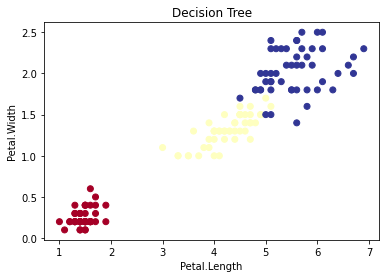

In [13]:
from matplotlib import pyplot as plt
X = iris.data[:,[2,3]]
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()

# 決策邊界

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn. datasets import load_iris
from sklearn import tree
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
clf = tree.DecisionTreeClassifier(max_depth=2) #兩層的決策樹
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [15]:
# 把x y最小值最大值取出
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [21]:
#x是0到7.9
x_min, x_max

(0.0, 7.9)

In [22]:
#y是-0.9到3.5
y_min, y_max

(-0.9, 3.5)

In [18]:
#np.meshgrid → 切棋盤式的方格
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), \
                     np.arange(y_min, y_max, 0.1))

In [19]:
xx

array([[0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
       [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
       [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
       ...,
       [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
       [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
       [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8]])

In [23]:
# xx的大小是44乘79 (0到7.9每隔0.1去切)
xx.shape

(44, 79)

In [24]:
yy

array([[-0.9, -0.9, -0.9, ..., -0.9, -0.9, -0.9],
       [-0.8, -0.8, -0.8, ..., -0.8, -0.8, -0.8],
       [-0.7, -0.7, -0.7, ..., -0.7, -0.7, -0.7],
       ...,
       [ 3.2,  3.2,  3.2, ...,  3.2,  3.2,  3.2],
       [ 3.3,  3.3,  3.3, ...,  3.3,  3.3,  3.3],
       [ 3.4,  3.4,  3.4, ...,  3.4,  3.4,  3.4]])

In [25]:
yy.shape

(44, 79)

In [26]:
# 合併xx yy
data = np.c_[xx.ravel(), yy.ravel()]

In [27]:
clf.predict(data)

array([0, 0, 0, ..., 2, 2, 2])

In [28]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

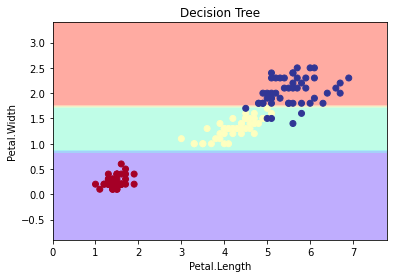

In [29]:
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()

# 線性模型:羅吉斯回歸，用來切資料，非貫穿所有的點
### 參數學習(Parameter Learning) 或稱為「參數化建模」(Parametric Modeling)
### 以未確定的數值參數指定模型結構，依特定的訓練資料算出最佳參數值
### 先根據專業知識挑選屬性，利用演算法調整參數，讓模型盡可能符合資料

In [48]:
!pip install scikit-learn  -U
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(iris.data, iris.target)

AttributeError: 'str' object has no attribute 'decode'

In [ ]:
predicted = clf.predict(iris.data)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

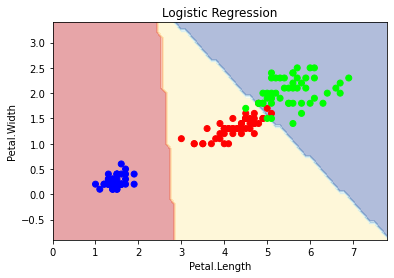

In [41]:

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot()
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()